# Import data, packages and preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.spatial import distance

In [2]:
data = pd.read_csv ('KPIs sample 5 cells data_train.csv',sep=";")

In [3]:
#data0 = data[data["cell_id"] == np.unique(data["cell_id"])[0]]

In [4]:
#data.dtypes

In [5]:
data = data.replace(np.inf, np.nan)
data = data.fillna(data.mean())

In [6]:
#data.isna().sum()

In [7]:
data.iloc[:, 2:data.shape[1]] = (data.iloc[:, 2:data.shape[1]]-data.iloc[:, 2:data.shape[1]].min())/(data.iloc[:, 2:data.shape[1]].max()-data.iloc[:, 2:data.shape[1]].min())

In [8]:
#data0 = data.iloc[:, 0:4]
data0 = data

# Least Distance by dimension

In [11]:
def find_nearest(array, value):
    array = np.asarray(array)
    answer = np.min(np.abs(array - value)[np.nonzero(np.abs(array - value))])
    return answer

In [12]:
Score = np.ones(data0.shape[0])
for i in range(data0.shape[0]):
    for j in range(data0.shape[1]-2):
        x = np.array(data0.iloc[:, j+2])
        Score[i] = Score[i]*find_nearest(np.delete(x, i), data0.iloc[i, j+2])*1.0e4

# Global Euclidian distance

In [13]:
Score = np.ones(data0.shape[0])
for i in range(data0.shape[0]):
    x = np.asarray(data0.iloc[i, 2:data0.shape[1]])
    Distance = np.ones(data0.shape[0])
    for j in range(data0.shape[0]):
        y = np.asarray(data0.iloc[j, 2:data0.shape[1]])
        Distance[j]= distance.euclidean(x, y)   
    Score[i] = np.min(Distance[np.nonzero(Distance)])

KeyboardInterrupt: 

# Saving scores in an excel sheet

In [ ]:
data1 = data0
data1['Score Algorithm'] = Score

In [ ]:
data1.to_csv('Score_Algorithm.csv',sep=";",index = False)

# Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)

In [ ]:
data = pd.read_csv ('KPIs sample 5 cells data_train.csv',sep=";")
data = data.replace(np.inf, np.nan)
data = data.fillna(data.mean())
data.iloc[:, 2:data.shape[1]] = (data.iloc[:, 2:data.shape[1]]-data.iloc[:, 2:data.shape[1]].min())/(data.iloc[:, 2:data.shape[1]].max()-data.iloc[:, 2:data.shape[1]].min())

#data0 = data.iloc[:, 0:4]
data0 = data

In [ ]:
# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
X_train = data0.iloc[:,2:data0.shape[1]]
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
score_pred_train = clf.decision_function(X_train)

In [ ]:
data2 = data1
data2['Binary Score Isolation Forest'] = y_pred_train
data2['Score Isolation Forest'] = score_pred_train

In [ ]:
data2.to_csv('Score_Algorithm_vs_RF.csv',sep=";",index = False)

# Some Analysis

In [ ]:
plt.scatter(score_pred_train, Score)
plt.show()

In [ ]:
np.corrcoef(score_pred_train, Score)

# Individual Contribution

In [ ]:
data = pd.read_csv ('KPIs sample 5 cells data_train.csv',sep=";")
data = data.replace(np.inf, np.nan)
data = data.fillna(data.mean())
data.iloc[:, 2:data.shape[1]] = (data.iloc[:, 2:data.shape[1]]-data.iloc[:, 2:data.shape[1]].min())/(data.iloc[:, 2:data.shape[1]].max()-data.iloc[:, 2:data.shape[1]].min())

#data0 = data.iloc[:, 0:4]
data0 = data

In [641]:
def find_nearest(array, value):
    array = np.asarray(array)
    answer = np.min(np.abs(array - value)[np.nonzero(np.abs(array - value))])
    return answer

In [685]:
column_names = data0.columns[2:data0.shape[1]]
Contributions = pd.DataFrame(columns = column_names)
for i in range(data0.shape[0]):
    Indv_Cont = np.ones(data0.shape[1]-2)
    for j in range(data0.shape[1]-2):
        x = np.array(data0.iloc[:, j+2])
        Indv_Cont[j] = find_nearest(np.delete(x, i), data0.iloc[i, j+2])*1.0e4
    Contributions.loc[len(Contributions)] = 100*Indv_Cont/sum(Indv_Cont)

In [689]:
Contributions.columns = [str(col) + '_Contribution' for col in Contributions.columns]

In [698]:
data3 = pd.concat([data0, Contributions], axis=1)

In [699]:
data3.to_csv('Anomaly_Contribution.csv',sep=";",index = False)

# Individual Contribution based also on euclidian

In [701]:
data = pd.read_csv ('KPIs sample 5 cells data_train.csv',sep=";")
data = data.replace(np.inf, np.nan)
data = data.fillna(data.mean())
data.iloc[:, 2:data.shape[1]] = (data.iloc[:, 2:data.shape[1]]-data.iloc[:, 2:data.shape[1]].min())/(data.iloc[:, 2:data.shape[1]].max()-data.iloc[:, 2:data.shape[1]].min())

#data0 = data.iloc[:, 0:4]
data0 = data

In [ ]:
Score = np.ones(data0.shape[0])
column_names = data0.columns[2:data0.shape[1]]
Contributions = pd.DataFrame(columns = column_names)
for i in range(data0.shape[0]):
    x = np.asarray(data0.iloc[i, 2:data0.shape[1]])
    Indv_Cont = np.ones(data0.shape[1]-2)
    Distance = np.ones(data0.shape[0])
    for j in range(data0.shape[0]):
        y = np.asarray(data0.iloc[j, 2:data0.shape[1]])
        Distance[j]= distance.euclidean(x, y) 
    Score[i] = np.min(Distance[np.nonzero(Distance)])
    min_index = np.argmin(Distance[np.nonzero(Distance)])+1
    z = np.asarray(data0.iloc[min_index, 2:data0.shape[1]])
    Indv_Cont = np.abs(x - z)
    Contributions.loc[len(Contributions)] = 100*Indv_Cont/sum(Indv_Cont)

In [731]:
Contributions.columns = [str(col) + '_Contribution' for col in Contributions.columns]

In [732]:
data4 = pd.concat([data0, Contributions], axis=1)

In [733]:
data4.to_csv('Anomaly_Contribution_euclidian.csv',sep=";",index = False)

# Score based on hyper cubes joint distribution

In [10]:
m = 10
epsilon = 1/data0.shape[0]
Area = np.ones(m*m)
Probability = np.ones(m*m)
Cont1 = np.ones(m*m)
Cont2 = np.ones(m*m)

In [11]:
x = data0.iloc[8154,:]
count = 0
index = 0
for n1 in range(1,m+1):
    for n2 in range(1,m+1):
        count = 0
        for j in range(data0.shape[0]):
            if (data0.iloc[j,4] <= (x[4]+1/n1)) and (data0.iloc[j,4] >= (x[4]-1/n1)) and \
            (data0.iloc[j,7] <= (x[7]+1/n2)) and (data0.iloc[j,7] >= (x[7]-1/n2)):
                count = count + 1
        index = index + 1 
        Area[index-1] = (1/n1)*(1/n2)
        Probability[index-1] = (count - 1)/data0.shape[0]
        Cont1[index-1] = 2/n1
        Cont2[index-1] = 2/n2
        #print(count)
    
Area = np.array(Area)
Probability = np.array(Probability)
Cont1 = np.array(Cont1)
Cont2 = np.array(Cont2)
dataset = pd.DataFrame({'Cont1': Cont1,'Cont2': Cont2,'Area': Area, 'Probability': Probability}, columns=['Cont1','Cont2','Area', 'Probability'])

In [12]:
filter_prob = dataset[(dataset['Probability'] <= epsilon ) & (dataset['Probability'] != 0)].index
dataset_filtered = dataset.loc[np.array(filter_prob),:]
filter_area = np.argmax(dataset_filtered['Area'])
print(dataset_filtered.iloc[filter_area,:])

Cont1          1.000000
Cont2          2.000000
Area           0.500000
Probability    0.000121
Name: 10, dtype: float64


In [135]:
dataset.to_csv('joint_distribution_score.csv',sep=";",index = False)

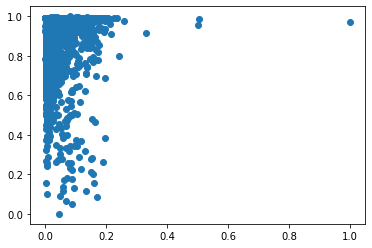

In [73]:
plt.scatter(data0.iloc[:,4], data0.iloc[:,7])
plt.show()

## Score based on hyper cubes joint distribution (Full data code)

In [72]:
m = 10 #number of steps to consider
n = 100 #number of observations
k = 3 #number of variables
epsilon = 0.01#1/data0.shape[0]
Result = pd.DataFrame(columns=['Observation Index', 'Anomaly Score'])
Area = np.ones(m**k)
Probability = np.ones(m**k)
Cont1 = np.ones(m**k)
Cont2 = np.ones(m**k)
Cont3 = np.ones(m**k)
Cont4 = np.ones(m**k)
Cont5 = np.ones(m**k)
Cont6 = np.ones(m**k)
Cont7 = np.ones(m**k)
Cont8 = np.ones(m**k)
Cont9 = np.ones(m**k)
Cont10 = np.ones(m**k)
Cont11 = np.ones(m**k)
Cont12 = np.ones(m**k)
Cont13 = np.ones(m**k)
Cont14 = np.ones(m**k)
Cont15 = np.ones(m**k)
Cont16 = np.ones(m**k)
Cont17 = np.ones(m**k)
Cont18 = np.ones(m**k)
Cont19 = np.ones(m**k)
Cont20 = np.ones(m**k)
Cont21 = np.ones(m**k)
Cont22 = np.ones(m**k)
Cont23 = np.ones(m**k)
Cont24 = np.ones(m**k)

In [ ]:
for i in range(n):
    x = data0.iloc[i,:]
    count = 0
    index = 0
    for n1 in range(1,m+1):
        for n2 in range(1,m+1):
            for n3 in range(1,m+1):
                for n4 in range(1,m+1):
                    for n5 in range(1,m+1):
                        for n6 in range(1,m+1):
                            for n7 in range(1,m+1):
                                for n8 in range(1,m+1):
                                    for n9 in range(1,m+1):
                                        for n10 in range(1,m+1):
                                            for n11 in range(1,m+1):
                                                for n12 in range(1,m+1):
                                                    for n13 in range(1,m+1):
                                                        for n14 in range(1,m+1):
                                                            for n15 in range(1,m+1):
                                                                for n16 in range(1,m+1):
                                                                    for n17 in range(1,m+1):
                                                                        for n18 in range(1,m+1):
                                                                            for n19 in range(1,m+1):
                                                                                for n20 in range(1,m+1):
                                                                                    for n21 in range(1,m+1):
                                                                                        for n22 in range(1,m+1):
                                                                                            for n23 in range(1,m+1):
                                                                                                for n24 in range(1,m+1):
                                                                                                    for j in range(data0.shape[0]):
                                                                                                        if (data0.iloc[j,2] <= (x[2]+1/n1)) and (data0.iloc[j,2] >= (x[2]-1/n1)) and \
                                                                                                        (data0.iloc[j,3] <= (x[3]+1/n2)) and (data0.iloc[j,3] >= (x[3]-1/n2)) and \
                                                                                                        (data0.iloc[j,4] <= (x[4]+1/n3)) and (data0.iloc[j,4] >= (x[4]-1/n3)) and \
                                                                                                        (data0.iloc[j,5] <= (x[5]+1/n4)) and (data0.iloc[j,5] >= (x[5]-1/n4)) and \
                                                                                                        (data0.iloc[j,6] <= (x[6]+1/n5)) and (data0.iloc[j,6] >= (x[6]-1/n5)) and \
                                                                                                        (data0.iloc[j,7] <= (x[7]+1/n6)) and (data0.iloc[j,7] >= (x[7]-1/n6)) and \
                                                                                                        (data0.iloc[j,8] <= (x[8]+1/n7)) and (data0.iloc[j,8] >= (x[8]-1/n7)) and \
                                                                                                        (data0.iloc[j,9] <= (x[9]+1/n8)) and (data0.iloc[j,9] >= (x[9]-1/n8)) and \
                                                                                                        (data0.iloc[j,10] <= (x[10]+1/n9)) and (data0.iloc[j,10] >= (x[10]-1/n9)) and \
                                                                                                        (data0.iloc[j,11] <= (x[11]+1/n10)) and (data0.iloc[j,11] >= (x[11]-1/n10)) and \
                                                                                                        (data0.iloc[j,12] <= (x[12]+1/n11)) and (data0.iloc[j,12] >= (x[12]-1/n11)) and \
                                                                                                        (data0.iloc[j,13] <= (x[13]+1/n12)) and (data0.iloc[j,13] >= (x[13]-1/n12)) and \
                                                                                                        (data0.iloc[j,14] <= (x[14]+1/n13)) and (data0.iloc[j,14] >= (x[14]-1/n13)) and \
                                                                                                        (data0.iloc[j,15] <= (x[15]+1/n14)) and (data0.iloc[j,15] >= (x[15]-1/n14)) and \
                                                                                                        (data0.iloc[j,16] <= (x[16]+1/n15)) and (data0.iloc[j,16] >= (x[16]-1/n15)) and \
                                                                                                        (data0.iloc[j,17] <= (x[17]+1/n16)) and (data0.iloc[j,17] >= (x[17]-1/n16)) and \
                                                                                                        (data0.iloc[j,18] <= (x[18]+1/n17)) and (data0.iloc[j,18] >= (x[18]-1/n17)) and \
                                                                                                        (data0.iloc[j,19] <= (x[19]+1/n18)) and (data0.iloc[j,19] >= (x[19]-1/n18)) and \
                                                                                                        (data0.iloc[j,20] <= (x[20]+1/n19)) and (data0.iloc[j,20] >= (x[20]-1/n19)) and \
                                                                                                        (data0.iloc[j,21] <= (x[21]+1/n20)) and (data0.iloc[j,21] >= (x[21]-1/n20)) and \
                                                                                                        (data0.iloc[j,22] <= (x[22]+1/n21)) and (data0.iloc[j,22] >= (x[22]-1/n21)) and \
                                                                                                        (data0.iloc[j,23] <= (x[23]+1/n22)) and (data0.iloc[j,23] >= (x[23]-1/n22)) and \
                                                                                                        (data0.iloc[j,24] <= (x[24]+1/n23)) and (data0.iloc[j,24] >= (x[24]-1/n23)) and \
                                                                                                        (data0.iloc[j,25] <= (x[25]+1/n24)) and (data0.iloc[j,25] >= (x[25]-1/n24)):
                                                                                                            count = count + 1
                                                                                                    index = index + 1 
                                                                                                    Area[index-1] = (1/n1)*(1/n2)
                                                                                                    Probability[index-1] = (count - 1)/data0.shape[0]                                                                                                    
    Area = np.array(Area)
    Probability = np.array(Probability)
    dataset = pd.DataFrame({'Area': Area, 'Probability': Probability}, columns=['Area', 'Probability'])
    filter_prob = dataset[(dataset['Probability'] <= epsilon ) & (dataset['Probability'] != 0)].index
    dataset_filtered = dataset.loc[np.array(filter_prob),:]
    filter_area = np.argmax(dataset_filtered['Area'])
    Result.append({'Observation Index': i, 'Anomaly Score': dataset_filtered.iloc[filter_area,2]}, ignore_index=True)
    
    

## Adapt number of variables

In [73]:
for i in range(n):
    x = data0.iloc[i,:]
    count = 0
    index = 0
    for n1 in range(1,m+1):
        for n2 in range(1,m+1):
            for n3 in range(1,m+1):
                if (data0.iloc[j,2] <= (x[2]+1/n1)) and (data0.iloc[j,2] >= (x[2]-1/n1)) and \
                (data0.iloc[j,3] <= (x[3]+1/n2)) and (data0.iloc[j,3] >= (x[3]-1/n2)) and \
                (data0.iloc[j,4] <= (x[4]+1/n3)) and (data0.iloc[j,4] >= (x[4]-1/n3)):
                    count = count + 1
            index = index + 1 
            Area[index-1] = (1/n1)*(1/n2)
            Probability[index-1] = (count - 1)/data0.shape[0]                                                                                                    
    Area = np.array(Area)
    Probability = np.array(Probability)
    dataset = pd.DataFrame({'Area': Area, 'Probability': Probability}, columns=['Area', 'Probability'])
    filter_prob = dataset[(dataset['Probability'] <= epsilon ) & (dataset['Probability'] != 0)].index
    dataset_filtered = dataset.loc[np.array(filter_prob),:]
    filter_area = np.argmax(dataset_filtered['Area'])
    Result = Result.append({'Observation Index': i, 'Anomaly Score': dataset_filtered.iloc[filter_area,0]}, ignore_index=True)
    